#  LabTest: ML model deployment



In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


## Import Packages

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle


## Prepare Data

In [32]:
!pip install palmerpenguins
import palmerpenguins as pps
df_org = pps.load_penguins()
df_org.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Handle Missing Data

In [36]:
df_org.isna().sum()/len(df_org)*10

,0
species,0.000000
island,0.000000
bill_length_mm,0.058140
bill_depth_mm,0.058140
flipper_length_mm,0.058140
body_mass_g,0.058140
sex,0.319767
year,0.000000


In [40]:
df = df_org.dropna(subset = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

<ipython-input-40-0a8fe385e93b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
<ipython-input-40-0a8fe385e93b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace(to_replace='.', value = df['sex'].mode()[0])


In [41]:
df.isna().sum()/len(df)*100

,0
species,0.0
island,0.0
bill_length_mm,0.0
bill_depth_mm,0.0
flipper_length_mm,0.0
body_mass_g,0.0
sex,0.0
year,0.0


## Categotical Encoding

In [42]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [43]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [44]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [45]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [46]:
X = df.drop('species', axis=1)
y = df['species']

In [47]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using XXX Alg

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame

# Create a LabelEncoder for the 'species' column
species_encoder = LabelEncoder()
df['species'] = species_encoder.fit_transform(df['species'])

# Create a LabelEncoder for the island column
if 'island' in df.columns:
    island_encoder = LabelEncoder()
    df['island'] = island_encoder.fit_transform(df['island'])

# Create a LabelEncoder or OneHotEncoder for the 'sex' column
# Label Encoding
# sex_encoder = LabelEncoder()
# df['sex'] = sex_encoder.fit_transform(df['sex'])

# One-Hot Encoding using ColumnTransformer (Recommended for categorical features)
categorical_features = ['sex']  # Replace with your categorical column names
numerical_features = df.drop(['species', 'sex', 'island'], axis=1).columns  # Adjust as needed
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])


# Split data into features and target
X = df.drop('species', axis=1)
y = df['species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression()) # Your classifier
])

# Fit the pipeline
model.fit(X_train, y_train)

<ipython-input-58-d69a82b367c1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = species_encoder.fit_transform(df['species'])
<ipython-input-58-d69a82b367c1>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = island_encoder.fit_transform(df['island'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex'])])),
                ('classifier', LogisticRegression())])

## Testing / Evaluation

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is your DataFrame

# Create a LabelEncoder for the 'species' column
species_encoder = LabelEncoder()
df['species'] = species_encoder.fit_transform(df['species'])

# Create a LabelEncoder for the island column
if 'island' in df.columns:
    island_encoder = LabelEncoder()
    df['island'] = island_encoder.fit_transform(df['island'])

# Split data into features and target BEFORE preprocessing
X = df.drop('species', axis=1)
y = df['species']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
# One-Hot Encoding using ColumnTransformer (Recommended for categorical features)
categorical_features = ['sex']  # Replace with your categorical column names
numerical_features = X.select_dtypes(include=['number']).columns # Select numerical columns only

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression()) # Your classifier
])

# Fit the pipeline
model.fit(X_train, y_train)

<ipython-input-68-465e7430dd5e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = species_encoder.fit_transform(df['species'])
<ipython-input-68-465e7430dd5e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = island_encoder.fit_transform(df['island'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'year'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex'])])),
                ('classifier', LogisticRegression())])

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        35
           1     1.0000    1.0000    1.0000        11
           2     1.0000    1.0000    1.0000        23

    accuracy                         1.0000        69
   macro avg     1.0000    1.0000    1.0000        69
weighted avg     1.0000    1.0000    1.0000        69



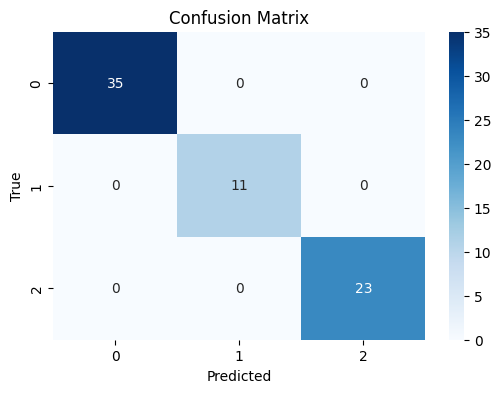

In [69]:
# Make predictions
y_pred = model.predict(X_test)

summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_encoder.inverse_transform(model.named_steps['classifier'].classes_),
            yticklabels=species_encoder.inverse_transform(model.named_steps['classifier'].classes_))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

## Save Model and etc.

In [70]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_xxx.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [71]:
import pickle
import pandas as pd

In [75]:

with open('model_penguin_xxx.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

### New data

In [76]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for creating x_new and fitting encoders) ...

# Rename columns in x_new to match the expected column names by the model
x_new = x_new.rename(columns={
    'culmen_length_mm': 'bill_length_mm',
    'culmen_depth_mm': 'bill_depth_mm'
})

# Add a 'year' column if it was used during training
# Assuming you have a default year value to use:
x_new['year'] = 2023  # Replace with the appropriate year value

# Before transforming, handle unseen labels
# For 'sex' column
# Check if the category is not already in the classes
# Instead of trying to append a string to the sex_encoder.classes_, we need to ensure the values in x_new['sex'] are categorical
# and match the expected categories by the sex_encoder
x_new['sex'] = x_new['sex'].astype(str)  # Ensure 'sex' column contains strings

# Ensure 'island' column is treated as a string
x_new['island'] = x_new['island'].astype(str)


# Handle unseen labels for 'island'
# Get a list of known island categories from the encoder
known_island_categories = list(island_encoder.classes_)
# Replace unknown island categories with a placeholder or handle them appropriately
x_new['island'] = x_new['island'].apply(lambda x: x if x in known_island_categories else known_island_categories[0])  # Replace with a known category or handle differently


# Transform categorical features
x_new['island'] = island_encoder.transform(x_new['island'])

# Handle unseen labels for 'sex'
# Get a list of known sex categories from the encoder
known_sex_categories = list(sex_encoder.classes_)
# Replace unknown sex categories with a placeholder or handle them appropriately
x_new['sex'] = x_new['sex'].apply(lambda x: x if x in known_sex_categories else known_sex_categories[0])  # Replace with a known category or handle differently

x_new['sex'] = sex_encoder.transform(x_new['sex'])


### Predicting

In [97]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# ... (your existing code for creating x_new and fitting encoders) ...

# Rename columns in x_new to match the expected column names by the model
x_new = x_new.rename(columns={
    'culmen_length_mm': 'bill_length_mm',
    'culmen_depth_mm': 'bill_depth_mm'
})

# Add a 'year' column if it was used during training
# Assuming you have a default year value to use:
x_new['year'] = 2023  # Replace

### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [102]:
%%writefile app_predict_penguin_XXX.py


#xxxx



Overwriting app_predict_penguin_XXX.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [99]:
%%writefile requirements.txt

scikit-learn
pandas


Writing requirements.txt
